<a href="https://colab.research.google.com/github/BishalKhatri1/BishalKhatri1/blob/main/_Praticing_Credit_Card_Fraud_Detection_with_Isolation_ForestBishal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Praticing Credit Card Fraud Detection with Isolation Forest


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix



## Step 1: Load the Dataset

Loading  the CSV file containing credit card transactions.  
The `Class` column indicates whether a transaction is **normal (0)** or **fraud (1)**.


In [ ]:
df = pd.read_csv('creditcard.csv')  # just load it directly
df.head()  # see the first 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
display(df[['Time', 'Amount']].describe())

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [ ]:
# Check class imbalance
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time','Amount']])


## Step 3: Split Features and Target

- `X` contains all the features (everything except `Class`)  
- `y` contains the target column (`Class`) indicating fraud or normal


In [ ]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Features (everything except Class)
print("X (features) first 5 rows:")
print(X.head())

# Target (Class column)
print("\ny (target) first 5 rows:")
print(y.head())


X (features) first 5 rows:
       Time        V1        V2        V3        V4        V5        V6  \
0  0.000000 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1  0.000000  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2  0.000006 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3  0.000006 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4  0.000012 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.239599  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474   
1 -0.078803  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.791461  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412   
3  0.237609  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321   
4  0.592941 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27

## Step 4: Train Isolation Forest

- Isolation Forest is an anomaly detection algorithm.  
- `contamination` = fraction of expected frauds (0.17% in this dataset).  
- The model learns what normal transactions look like and flags anomalies.


In [ ]:
# contamination = 0.0017 (~fraud ratio)
model = IsolationForest(contamination=0.0017, random_state=42)
model.fit(X)


IsolationForest(contamination=0.0017, random_state=42)

## Step 5: Predict Anomalies

- `1` = normal transaction  
- `-1` = anomaly/fraud


In [ ]:
# Predict anomalies
df['anomaly'] = model.predict(X)
df['anomaly'] = df['anomaly'].map({1:0, -1:1})  # 0=normal, 1=fraud


--- Confusion Matrix ---
[[283955    360]
 [   367    125]]


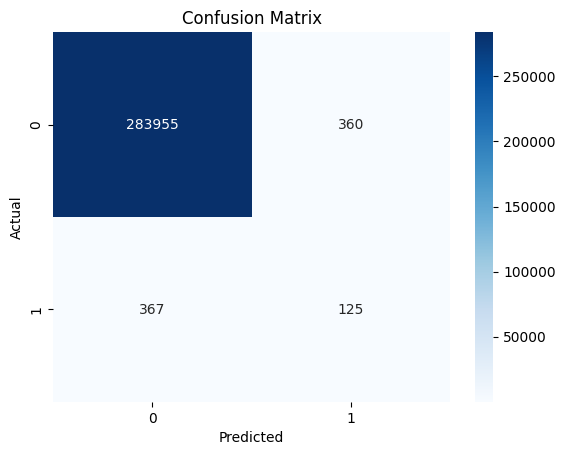


--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.26      0.25      0.26       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807



In [ ]:
# 6 Evaluate model
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y, df['anomaly']))
# same thing
cm = confusion_matrix(y, df['anomaly'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\n--- Classification Report ---")
print(classification_report(y, df['anomaly']))

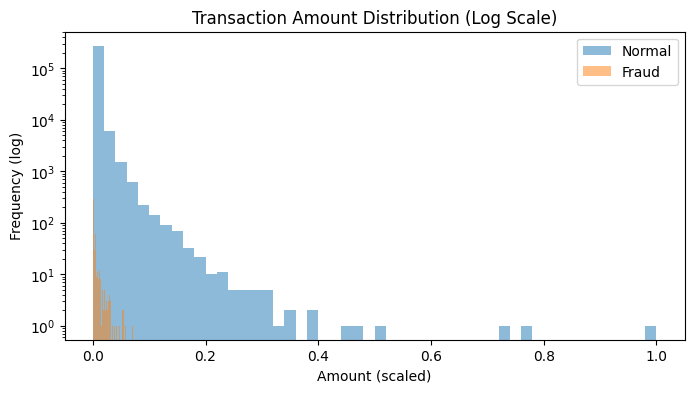

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(df[df['Class']==0]['Amount'], bins=50, alpha=0.5, label='Normal')
plt.hist(df[df['Class']==1]['Amount'], bins=50, alpha=0.5, label='Fraud')
plt.yscale('log')  # <- important! makes small counts visible
plt.title('Transaction Amount Distribution (Log Scale)')
plt.xlabel('Amount (scaled)')
plt.ylabel('Frequency (log)')
plt.legend()
plt.show()
